In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

# 백분위수 (percentile) 와 사분계수(quantile)
---

- 백분위수 : 데이터를 크기 순서대로 오름차순 정렬 했을 때, 백분율로 나타낸 특정 위치의 값
    - 그림은 10%단위지만, 1자리수 단위로 측정가능하다.

![image](https://user-images.githubusercontent.com/74717033/133714935-ab07b6bb-78c2-4e22-ba14-db341e9881ee.png)



- 사분위수 : 데이터를 크기 순서대로 오름차운으로 정렬 했을 때, 4등분한 위치의 값

![image](https://user-images.githubusercontent.com/74717033/133714995-745e9505-96e2-4f3e-b423-abf343e384a6.png)

- 실질적으론 사분위수가 백분위수에 포함되어 백분위수만 확인해도 되지만, 실제 분석에서는 사분위수를 살펴보는 것이 더 유용하다.

## 백분위수 & 사분위수 구현코드

- 백분위수
    - numpy.percentile(x,q) # q : 1 ~ 100중 확인하고 싶은 위치

- 사분위수
    - numpy.quantile(x,q) # q : 0 ~ 1 중 확인하고 싶은 위치
    
    
- 하지만 실상 둘이 같은 역할을 함.
    - e.g) 전체 데이터중 50%의 값을 보고 싶을때
        - numpy.percentile(x,50)
        - numpy.quantile(x,0.5)

In [2]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [3]:
# 10% 위치에 있는 값 출력하기
print(np.percentile(x, 10))
print(np.quantile(x, 0.1)) # 사실상 같음

2.0
2.0


In [4]:
# 25%에 있는 값 출력하기
print(np.percentile(x, 25))
print(np.quantile(x, 0.25)) # 사실상 같음

3.5
3.5


- 실제 x를 보면 3.5라는 값은 존재하지 않는다. 그런데 왜 3.5가 나왔을까?
    - x라는 값의 25%에 해당하는 값을 출력하기 때문
    - 전체 x값을 오름차순 정렬했을때 25% 부분에 해당하는 값이 없다면, 실제 존재하는 값에서 25%에 해당하는 중간치의 값을 출력


- 즉, percentile이나 quantile을 사용할때는 실제 데이터셋에는 없는 값이어도 출력이 될 수 있다. 해당 값이 출력된다고 해서 그 값이 무조건 데이터 셋에 존재하는 것은 아닐 수도 있음을 인지하고 있어야 함.

# 왜도 (Skewness)
---

- 왜도 : 분포의 비대칭도를 나타내는 통계량
    - 왜도가 음수 : 오른쪽으로 치우쳐 있음
    - 왜도가 양수 : 왼쪽으로 치우쳐 있음
    - 왜도가 0 : 정규분포 모양을 따름
    
![image](https://user-images.githubusercontent.com/74717033/133715736-6f894810-5c54-4760-8f39-90116b7918e5.png)

- 일반적으로 왜도의 절대값이 1.5이상이면 많이 치우쳤다고 판단한다. (절대적인 기준은 아님)

## 왜도 구현 코드

- scipy.stats.skew(x)
- Series(x).skew()

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [6] * 30 + [7] * 20 + [8] * 20 + [9] * 15 + [10] * 15 # 좌측으로 치우침
x2 = [6] * 15 + [7] * 20 + [8] * 30 + [9] * 20 + [10] * 15 # 치우치지 않음
x3 = [6] * 15 + [7] * 15 + [8] * 20 + [9] * 20 + [10] * 30 # 우측으로 치우침

In [6]:
pd.Series(x1).value_counts(sort = False)

6     30
7     20
8     20
9     15
10    15
dtype: int64

In [7]:
pd.Series(x2).value_counts(sort = False)

6     15
7     20
8     30
9     20
10    15
dtype: int64

In [8]:
pd.Series(x3).value_counts(sort = False)

6     15
7     15
8     20
9     20
10    30
dtype: int64

각 변수 시각화

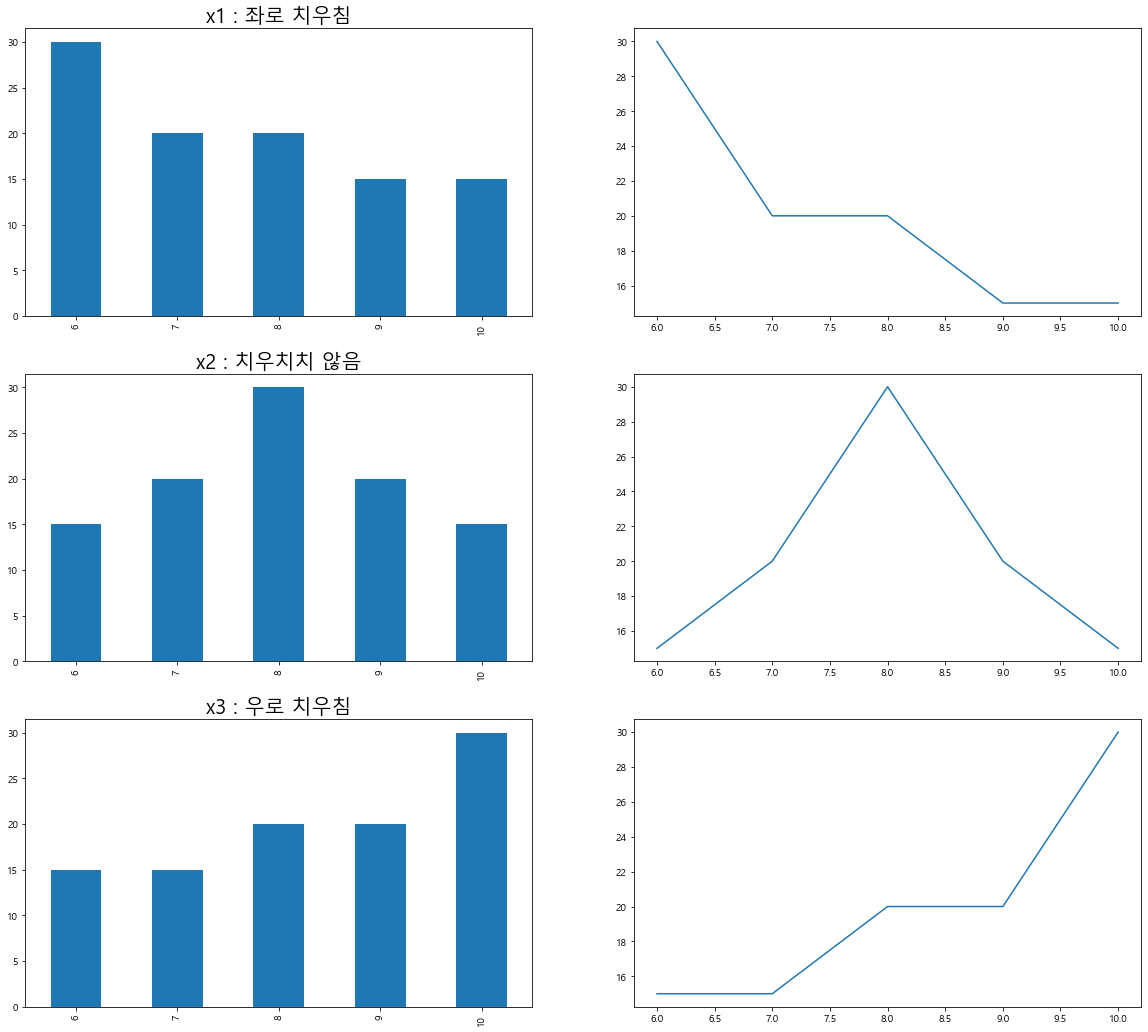

In [9]:
# canvas 크기설정
plt.figure(figsize=(20,18))

# 데이터 치우침 정도를 보기 위해 sort= False로 지정
# default가 빈도순 정렬이기 때문에 True로 하면 데이터의 위치가 바뀌게 됨


# x1 시각화
plt.subplot(321)
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')
plt.title('x1 : 좌로 치우침', fontsize = 20)

plt.subplot(322)
pd.Series(x1).value_counts(sort = False).plot(kind = 'line')

# x2 시각화
plt.subplot(323)
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')
plt.title('x2 : 치우치치 않음', fontsize = 20)
plt.subplot(324)
pd.Series(x2).value_counts(sort = False).plot(kind = 'line')


# x3 시각화
plt.subplot(325)
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')
plt.title('x3 : 우로 치우침', fontsize = 20)
plt.subplot(326)
pd.Series(x3).value_counts(sort = False).plot(kind = 'line')


plt.show()

In [10]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.31928010084863523
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863545


- 왜도값이 1.5를 넘기진 않았으나 치우친 방향에 따라 양수/음수 값을 가진다.
    - 좌로 치우쳤을 경우 양수값
    - 우로 치우쳤을 경우 음수값
    - 치우치지 않았을때 0

# 첨도 (kurtosis)
---
![image](https://user-images.githubusercontent.com/74717033/134148332-82451aa7-13e0-4520-9367-a53eae6eee77.png)

---
- 데이터의 분포가 얼마나 뾰족한지에 대한 값
- 첨도가 높을 수록 변수가 좁은 범위에 몰려있는 것
- 일반적으로 아래와 같이 3을 기준으로 구분 (정규분포를 따른다는 가정하에)
    - 첨도 > 3 이면 데이터가 집약되어있다.
    - 첨도 = 3 이면 정규분포 모양이다.
    - 첨도 < 3 이면 데이터사 산포되어 flat한 형태이다.
- 하지만 절대적인 기준은 아니다.

## 첨도 구현 코드

- scipy.stats.kurtosis(x)
- Series(x).kurtosis()

In [11]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

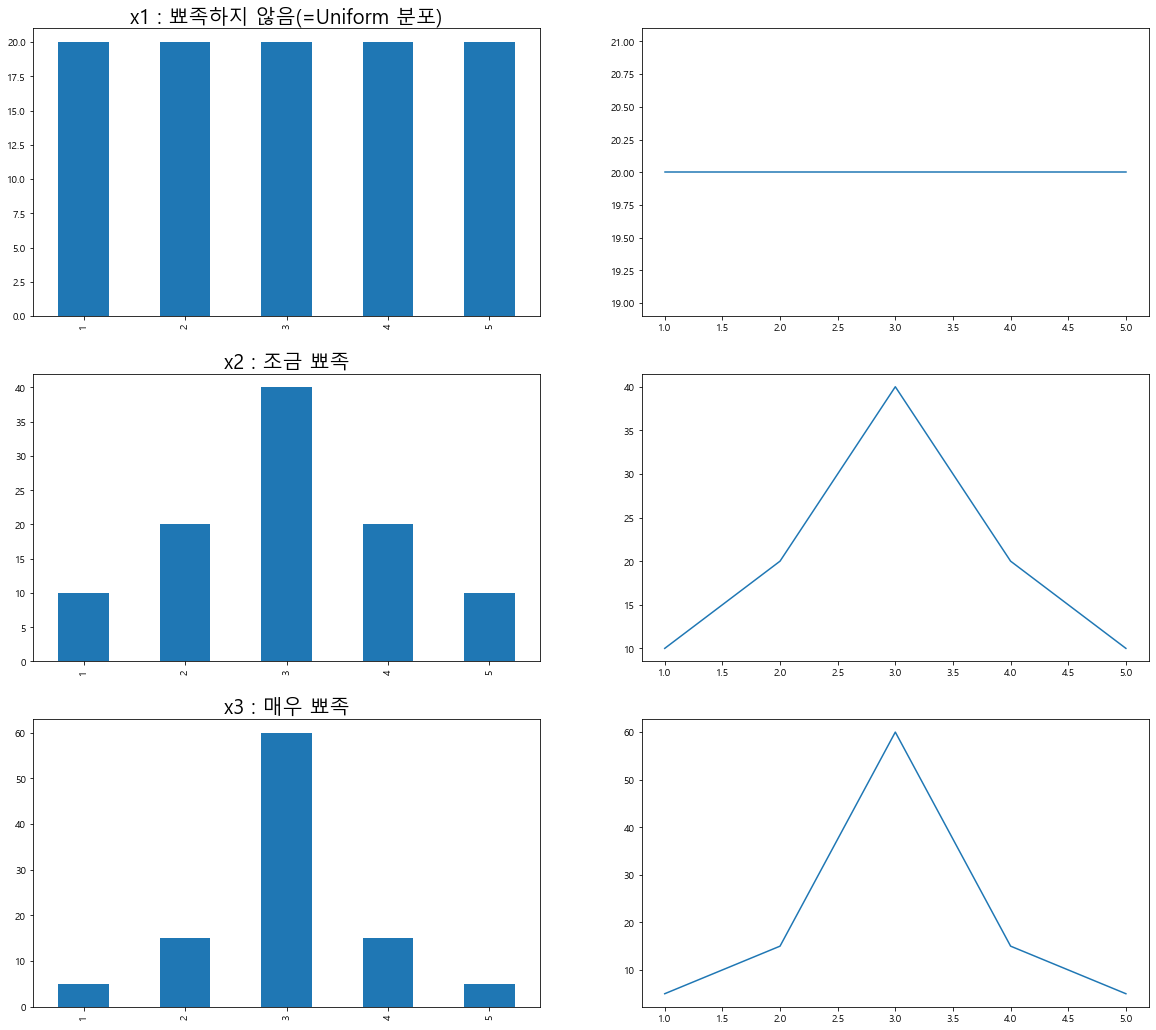

In [14]:
# canvas 크기설정
plt.figure(figsize=(20,18))

# 데이터 치우침 정도를 보기 위해 sort= False로 지정
# default가 빈도순 정렬이기 때문에 True로 하면 데이터의 위치가 바뀌게 됨


# x1 시각화
plt.subplot(321)
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')
plt.title('x1 : 뾰족하지 않음(=Uniform 분포)', fontsize = 20)

plt.subplot(322)
pd.Series(x1).value_counts(sort = False).plot(kind = 'line')

# x2 시각화
plt.subplot(323)
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')
plt.title('x2 : 조금 뾰족', fontsize = 20)
plt.subplot(324)
pd.Series(x2).value_counts(sort = False).plot(kind = 'line')


# x3 시각화
plt.subplot(325)
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')
plt.title('x3 : 매우 뾰족', fontsize = 20)
plt.subplot(326)
pd.Series(x3).value_counts(sort = False).plot(kind = 'line')


plt.show()

In [13]:
print("뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636


- 데이터가 1~5 사이의 값을 갖는 범주형 (categorical) 변수이다.
    - 따라서 첨도값이 3이상이 나오지 않을 수 있다.
    
    
- 포인트는 데이터의 분포 모양에 따라 첨도의 값이 달라진다는 점이다.
    - 평평할때는 첨도가 음수값도 나올수 있다.
    - 분포가 뾰족할 수록 첨도값이 양수에 가까워짐을 알 수 있다.